In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('../Datos/Base.csv')

In [2]:
X = dataset.drop(columns=['NObeyesdad'])
y = dataset['NObeyesdad']

In [3]:
X_final = X.drop(columns=['Height', 'Weight'])
print(X_final)

      Gender        Age family_history_with_overweight FAVC  FCVC  NCP  \
0     Female  21.000000                            yes   no   2.0  3.0   
1     Female  21.000000                            yes   no   3.0  3.0   
2       Male  23.000000                            yes   no   2.0  3.0   
3       Male  27.000000                             no   no   3.0  3.0   
4       Male  22.000000                             no   no   2.0  1.0   
...      ...        ...                            ...  ...   ...  ...   
2106  Female  20.976842                            yes  yes   3.0  3.0   
2107  Female  21.982942                            yes  yes   3.0  3.0   
2108  Female  22.524036                            yes  yes   3.0  3.0   
2109  Female  24.361936                            yes  yes   3.0  3.0   
2110  Female  23.664709                            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC       FAF       TUE        CALC  \
0     Sometimes    no  2.000000   no  0

## Ahora trabajamos con 14 columnas de las 16 iniciales.

Se aplica el metodo de Encoders, comenzando por las columnas binarias. 

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import TargetEncoder

In [5]:
### OHE -> ['SMOKE', 'family_history_with_overweight', 'FAVC', 'SCC'].
### ORD -> [''] No se usará en este ejercicio.
### TE -> [''] No se usara en este ejercicio. 

OHE_COLS=['SMOKE', 'family_history_with_overweight', 'FAVC', 'SCC','CALC','Gender','CAEC','MTRANS']

Se instancian los objetos

In [6]:
ohe=OneHotEncoder()
ord=OrdinalEncoder()
te=TargetEncoder()

Se hace el fit de los objetos con los datos

In [7]:
ohe.fit(X_final[OHE_COLS])

OneHotEncoder()

Se hace la transformación de los datos

In [8]:

ohe_data=ohe.transform(X_final[OHE_COLS]).toarray()


Se hace un merge de los datos

In [9]:
X_cat=pd.concat([pd.DataFrame(ohe_data)],axis=1)

X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# No se usara te_data=te.transform(X_final[TE_COLS])

## Hacemos un merge de los datos

X_cat=pd.concat([pd.DataFrame(ohe_data)],axis=1)

X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Se realiza fit_transform de las variables numéricas

Estandarización de las variables numéricas de la siguiente forma:

StandardScaler -> ['Age', 'FAVC','NCP']

MinMaxScaler -> ['CH2O','FAF','TUE']

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

SS_COLS=['Age','NCP','FCVC']
MM_COLS=['CH2O','FAF','TUE']


Se instancian los objetos

In [12]:
ss=StandardScaler()
mm=MinMaxScaler()

Fit de los objetos

In [13]:
ss.fit(X_final[SS_COLS])      
mm.fit(X_final[MM_COLS])

MinMaxScaler()

Transformación de los datos

In [14]:
ss_data=ss.transform(X_final[SS_COLS])
mm_data=mm.transform(X_final[MM_COLS])

Merge de los datos

In [15]:
X_final_data_num=pd.concat([pd.DataFrame(ss_data),pd.DataFrame(mm_data)],axis=1)
X_final_data_num.columns=['Age','NCP','CH2O','FAF','TUE','FCVC']

X_final_data_num.head()

,Age,NCP,CH2O,FAF,TUE,FCVC
0,-0.522124,0.404153,-0.785019,0.5,0.000000,0.5
1,-0.522124,0.404153,1.088342,1.0,1.000000,0.0
2,-0.206889,0.404153,-0.785019,0.5,0.666667,0.5
3,0.423582,0.404153,1.088342,0.5,0.666667,0.0
4,-0.364507,-2.167023,-0.785019,0.5,0.000000,0.0


## Pipeline

In [16]:
## PIPELINE y COLUMN TRANSFORMER
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

## Instanciamos los objetos
imp_cat = SimpleImputer(strategy='constant',fill_value='?')
imp_num = SimpleImputer(strategy='mean')
ohe=OneHotEncoder(sparse_output=False)
ord=OrdinalEncoder()
te=TargetEncoder()
ss=StandardScaler()
mm=MinMaxScaler()

cat_pipe_ohe=Pipeline(steps=[('imputer',imp_cat),
                             ('encoder',ohe)])

cat_pipe_ord=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',ord)])

cat_pipe_te=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',te)])

num_pipe_ss=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',ss)])

num_pipe_mm=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',mm)])

## Hacemos un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe', cat_pipe_ohe, OHE_COLS),
        ('num_ss', num_pipe_ss, SS_COLS),
        ('num_mm', num_pipe_mm, MM_COLS)
    ])


In [17]:
preprocessor

ColumnTransformer(transformers=[('cat_ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['SMOKE', 'family_history_with_overweight',
                                  'FAVC', 'SCC', 'CALC', 'Gender', 'CAEC',
                                  'MTRANS']),
                                ('num_ss',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'NCP', 'FCVC']),
                                ('num_mm',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['CH2O', 'FAF', 'TUE'])])

Data procesada

In [18]:

data_source = pd.concat([X, y], axis=1)

pd.set_option('display.max_columns', None)

data_processed_arr=preprocessor.fit_transform(X_final[OHE_COLS+SS_COLS+MM_COLS],y)

data_processed=pd.DataFrame(data_processed_arr)

data_processed.columns=preprocessor.transformers_[0][1]['encoder'].get_feature_names_out().tolist()+SS_COLS+MM_COLS

data_processed.head()

,x0_no,x0_yes,x1_no,x1_yes,x2_no,x2_yes,x3_no,x3_yes,x4_Always,x4_Frequently,x4_Sometimes,x4_no,x5_Female,x5_Male,x6_Always,x6_Frequently,x6_Sometimes,x6_no,x7_Automobile,x7_Bike,x7_Motorbike,x7_Public_Transportation,x7_Walking,Age,NCP,FCVC,CH2O,FAF,TUE
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.522124,0.404153,-0.785019,0.5,0.000000,0.5
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.522124,0.404153,1.088342,1.0,1.000000,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.206889,0.404153,-0.785019,0.5,0.666667,0.5
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.423582,0.404153,1.088342,0.5,0.666667,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.364507,-2.167023,-0.785019,0.5,0.000000,0.0


## Random Forest

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Hiperparámetros

In [20]:

hip_rf={'n_estimators': [100,200,300],
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [ 5, 10,  20,  30],
                    'min_samples_split': [10,20,30,40],
                    'min_samples_leaf': [5,10,20,30]}

Definición del modelo

In [21]:

mod_rf=RandomForestClassifier()

modgrid=GridSearchCV(mod_rf,hip_rf,cv=5)

In [22]:
pipe=Pipeline(steps=[('preprocessor',preprocessor),
                        ('modelo',modgrid)])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['SMOKE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SCC', 'CALC',
                                                   'Gender', 'CAEC',
                                                   'MTRANS']),
                                                 ('num_ss',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sca...
                                                  ['Age', 'NCP', 'FCVC']),
                                                 ('num_mm',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CH2O', 'FAF', 'TUE'])])),
                ('modelo',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5, 10, 20, 30],
                                          'min_samples_leaf': [5, 10, 20, 30],
                                          'min_samples_split': [10, 20, 30, 40],
                                          'n_estimators': [100, 200, 300]}))])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['SMOKE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SCC', 'CALC',
                                                   'Gender', 'CAEC',
                                                   'MTRANS']),
                                                 ('num_ss',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sca...
                                                  ['Age', 'NCP', 'FCVC']),
                                                 ('num_mm',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CH2O', 'FAF', 'TUE'])])),
                ('modelo',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5, 10, 20, 30],
                                          'min_samples_leaf': [5, 10, 20, 30],
                                          'min_samples_split': [10, 20, 30, 40],
                                          'n_estimators': [100, 200, 300]}))])

In [24]:
print(X.columns)
print(X_train.columns)
print(X_test.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [25]:
y_pred=pipe.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))
### Mejor modelo

pipe.named_steps['modelo'].best_params_

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.85      0.83        86
      Normal_Weight       0.59      0.62      0.60        93
     Obesity_Type_I       0.76      0.76      0.76       102
    Obesity_Type_II       0.76      0.95      0.85        88
   Obesity_Type_III       0.96      0.99      0.97        98
 Overweight_Level_I       0.76      0.61      0.68        88
Overweight_Level_II       0.72      0.56      0.63        79

           accuracy                           0.77       634
          macro avg       0.77      0.76      0.76       634
       weighted avg       0.77      0.77      0.77       634



{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

Feature ranking:
['x0_no', 'x0_yes', 'x1_no', 'x1_yes', 'x2_no', 'x2_yes', 'x3_no', 'x3_yes', 'x4_Always', 'x4_Frequently', 'x4_Sometimes', 'x4_no', 'x5_Female', 'x5_Male', 'x6_Always', 'x6_Frequently', 'x6_Sometimes', 'x6_no', 'x7_Automobile', 'x7_Bike', 'x7_Motorbike', 'x7_Public_Transportation', 'x7_Walking', 'Age', 'NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']
1. feature 25 (0.154243)
2. feature 23 (0.142631)
3. feature 24 (0.083506)
4. feature 28 (0.067094)
5. feature 26 (0.063677)
6. feature 13 (0.063026)
7. feature 27 (0.061356)
8. feature 12 (0.054312)
9. feature 3 (0.042277)
10. feature 2 (0.039170)
11. feature 10 (0.038096)
12. feature 16 (0.037767)
13. feature 11 (0.037152)
14. feature 15 (0.025002)
15. feature 21 (0.023852)
16. feature 18 (0.023290)
17. feature 4 (0.012990)
18. feature 5 (0.012135)
19. feature 17 (0.005916)
20. feature 6 (0.003941)
21. feature 7 (0.003166)
22. feature 9 (0.001968)
23. feature 22 (0.001272)
24. feature 14 (0.001070)
25. feature 0 (0.000591)
26. featu

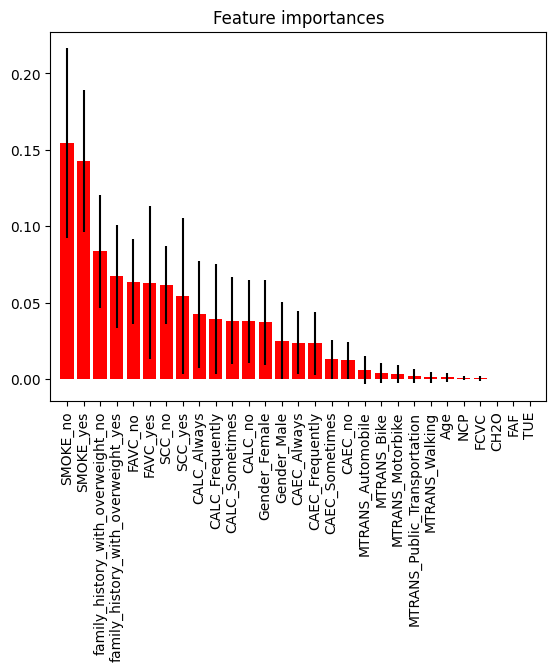

In [31]:
### Hagamos un gráfico de importancia de variables que sale
### una vez se entrena el modelo random forest

importances = pipe.named_steps['modelo'].best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe.named_steps['modelo'].best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
cols=preprocessor.transformers_[0][1]['encoder'].get_feature_names_out().tolist()+SS_COLS+MM_COLS
print(cols)


for f in range(len(cols)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

### Cambiamos x_i por el nombre de las variables en cols

df_cols=pd.DataFrame()
df_cols['cols_old']=cols

df_cols['cols_new']=df_cols['cols_old'].str.replace('x0_','SMOKE_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x1_','family_history_with_overweight_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x2_','FAVC_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x3_','SCC_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x4_','CALC_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x5_','Gender_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x6_','CAEC_')
df_cols['cols_new']=df_cols['cols_new'].str.replace('x7_','MTRANS_')

cols=df_cols['cols_new'].tolist()
                                        


# Plot the impurity-based feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(cols)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(cols)), cols, rotation=90)
plt.xlim([-1, len(cols)])
plt.show()

In [27]:
X.shape[1]

16

## Regresión logística

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [32]:
pipe.fit(X_train, y_train)


c:\Users\Usuario\anaconda3\envs\m3cidru2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['SMOKE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SCC', 'CALC',
                                                   'Gender', 'CAEC',
                                                   'MTRANS']),
                                                 ('num_ss',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'NCP', 'FCVC']),
                                                 ('num_mm',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CH2O', 'FAF', 'TUE'])])),
                ('classifier', LogisticRegression())])

In [33]:
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6214511041009464
Confusion Matrix:
 [[69  6  3  2  0  5  1]
 [29 29  6  1  4 13 11]
 [ 5  2 62 17  3  7  6]
 [ 1  0  9 75  0  0  3]
 [ 1  0  0  0 97  0  0]
 [ 7 12 11 14  1 40  3]
 [ 2  4 22 19  3  7 22]]
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.61      0.80      0.69        86
      Normal_Weight       0.55      0.31      0.40        93
     Obesity_Type_I       0.55      0.61      0.58       102
    Obesity_Type_II       0.59      0.85      0.69        88
   Obesity_Type_III       0.90      0.99      0.94        98
 Overweight_Level_I       0.56      0.45      0.50        88
Overweight_Level_II       0.48      0.28      0.35        79

           accuracy                           0.62       634
          macro avg       0.60      0.61      0.59       634
       weighted avg       0.61      0.62      0.60       634



## SVM / Máquinas de soporte vectorial

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [37]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['SMOKE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SCC', 'CALC',
                                                   'Gender', 'CAEC',
                                                   'MTRANS']),
                                                 ('num_ss',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'NCP', 'FCVC']),
                                                 ('num_mm',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CH2O', 'FAF', 'TUE'])])),
                ('classifier', SVC())])

In [38]:
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7287066246056783
Confusion Matrix:
 [[73  7  0  0  0  6  0]
 [19 50  6  1  0  6 11]
 [ 2  3 66 13  2  7  9]
 [ 0  2  2 83  0  0  1]
 [ 0  1  0  0 97  0  0]
 [ 4 16 11  7  0 48  2]
 [ 1  5 12 10  1  5 45]]
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.74      0.85      0.79        86
      Normal_Weight       0.60      0.54      0.56        93
     Obesity_Type_I       0.68      0.65      0.66       102
    Obesity_Type_II       0.73      0.94      0.82        88
   Obesity_Type_III       0.97      0.99      0.98        98
 Overweight_Level_I       0.67      0.55      0.60        88
Overweight_Level_II       0.66      0.57      0.61        79

           accuracy                           0.73       634
          macro avg       0.72      0.73      0.72       634
       weighted avg       0.72      0.73      0.72       634



## Árbol de decisión

Se convierte la variable objetivo 'NObeyesdad' en numérica ('no' = 0 , 'yes' = 1), 

'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I' y 'Overweight_Level_II' = 0

'Obesity_Type_I', 'Obesity_Type_II' y 'Obesity_Type_III' = 1.

In [ ]:

dataset['NObeyesdad'] = dataset['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0, 'Obesity_Type_I':1, 'Obesity_Type_II':1, 'Obesity_Type_III':1})

dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


Se crea un nuevo dataset sin las variables height and weight

In [ ]:
Obes1 = dataset.drop(columns=['Height', 'Weight'], axis=1)
Obes1.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


In [ ]:
Obes1.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [ ]:
import numpy as np

Implementación en Python
1. Instalar las bibliotecas necesarias

In [ ]:
!pip install scikit-learn matplotlib

2. Importando las bibliotecas necesarias

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

3. Cargar y preparar los datos

In [ ]:
ObesC=Obes1.select_dtypes(include='object')
ObesC.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [ ]:
pd.set_option('display.max_columns', None)


ObesC_cat=pd.get_dummies(ObesC)
ObesC_cat.astype('int').head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
ObesN_num=Obes1.select_dtypes(include='number')
ObesN_num_X=ObesN_num.drop(columns='NObeyesdad')


from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()

Obes_num_transformed=scaler.fit_transform(ObesN_num_X)

y=ObesN_num['NObeyesdad']

Obes_num_X_transformed=pd.DataFrame(Obes_num_transformed, columns=ObesN_num_X.columns)
Obes_num_X_transformed.head()

,Age,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


Se genera matriz de entrada X

In [ ]:
X=pd.concat([ObesN_num_X,ObesC_cat],axis=1)

X.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,True,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
1,21.0,3.0,3.0,3.0,3.0,0.0,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False
2,23.0,2.0,3.0,2.0,2.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False
3,27.0,3.0,3.0,2.0,2.0,0.0,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True
4,22.0,2.0,1.0,2.0,0.0,0.0,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False


4. Dividir el conjunto de datos y entrenar el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Crear y entrenar el modelo de árbol de decisiones

In [ ]:
Modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
Modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

6. Evaluar el modelo

In [ ]:
y_pred = Modelo.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")

Exactitud del modelo: 0.75


7. Visualizar el árbol de decisiones

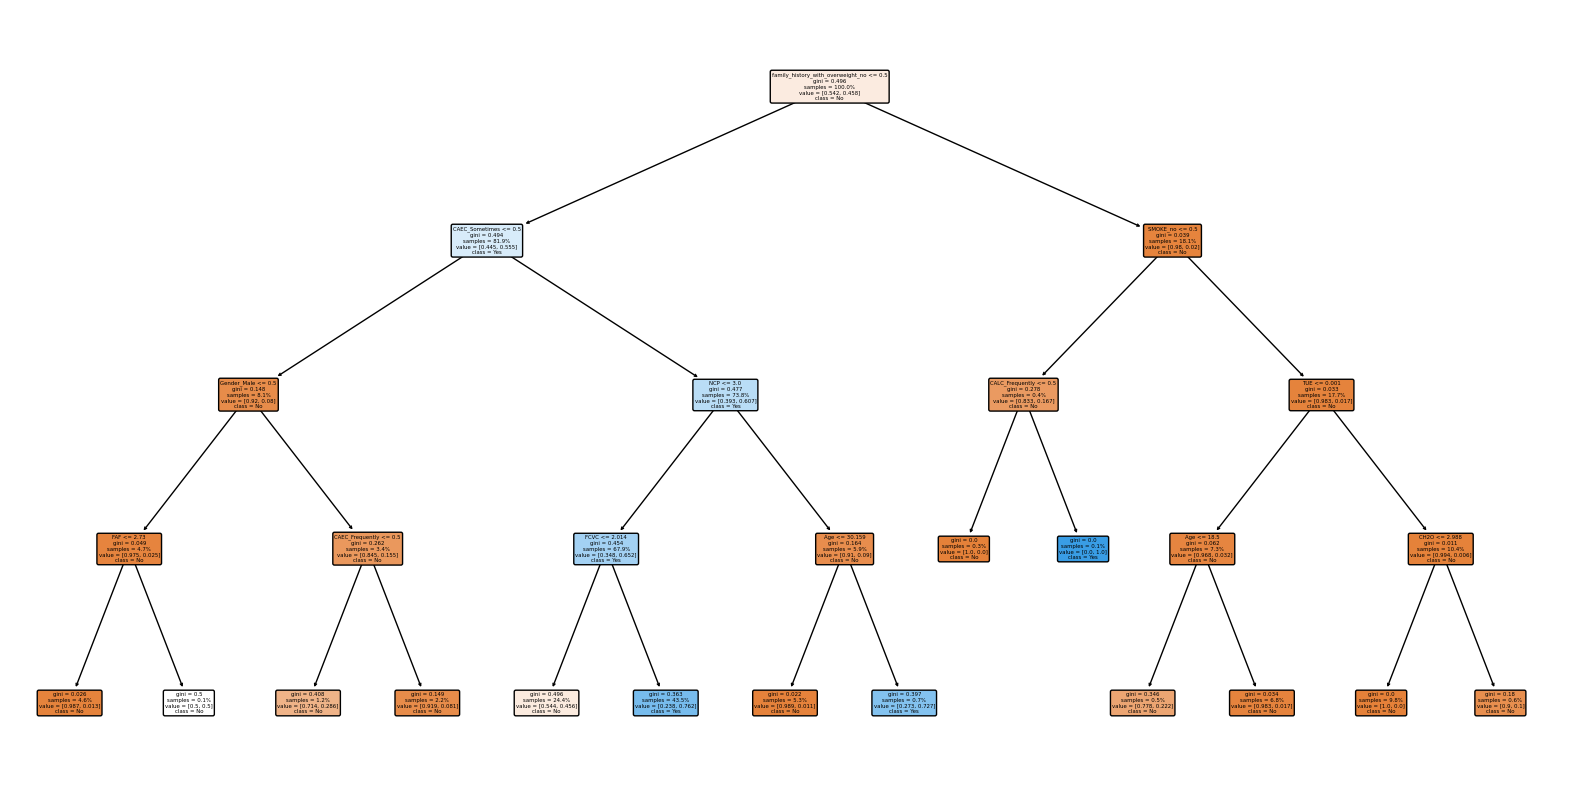

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(Modelo, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)
plt.show()

Otro árbol de decisión

In [ ]:
df = dataset

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


In [ ]:
columna_entrada = ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC','NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
columna_salida = ['NObeyesdad']

In [ ]:
X = df[columna_entrada]
X
X.select_dtypes(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [ ]:
X_trans_object = pd.get_dummies(X.select_dtypes(include="object"))
X_trans_object

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,True,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
1,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2107,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2108,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2109,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
X = pd.concat([X.select_dtypes(exclude="object"), X_trans_object],axis= 1)
X

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,True,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,False,True,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
y = df[columna_salida]
y

,NObeyesdad
0,0
1,0
2,0
3,0
4,0
...,...
2106,1
2107,1
2108,1
2109,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)
print("Matriz de confusion: \n", confusion_matrix(y_test, y_pred))

Matriz de confusion: 
 [[172  52]
 [ 33 166]]


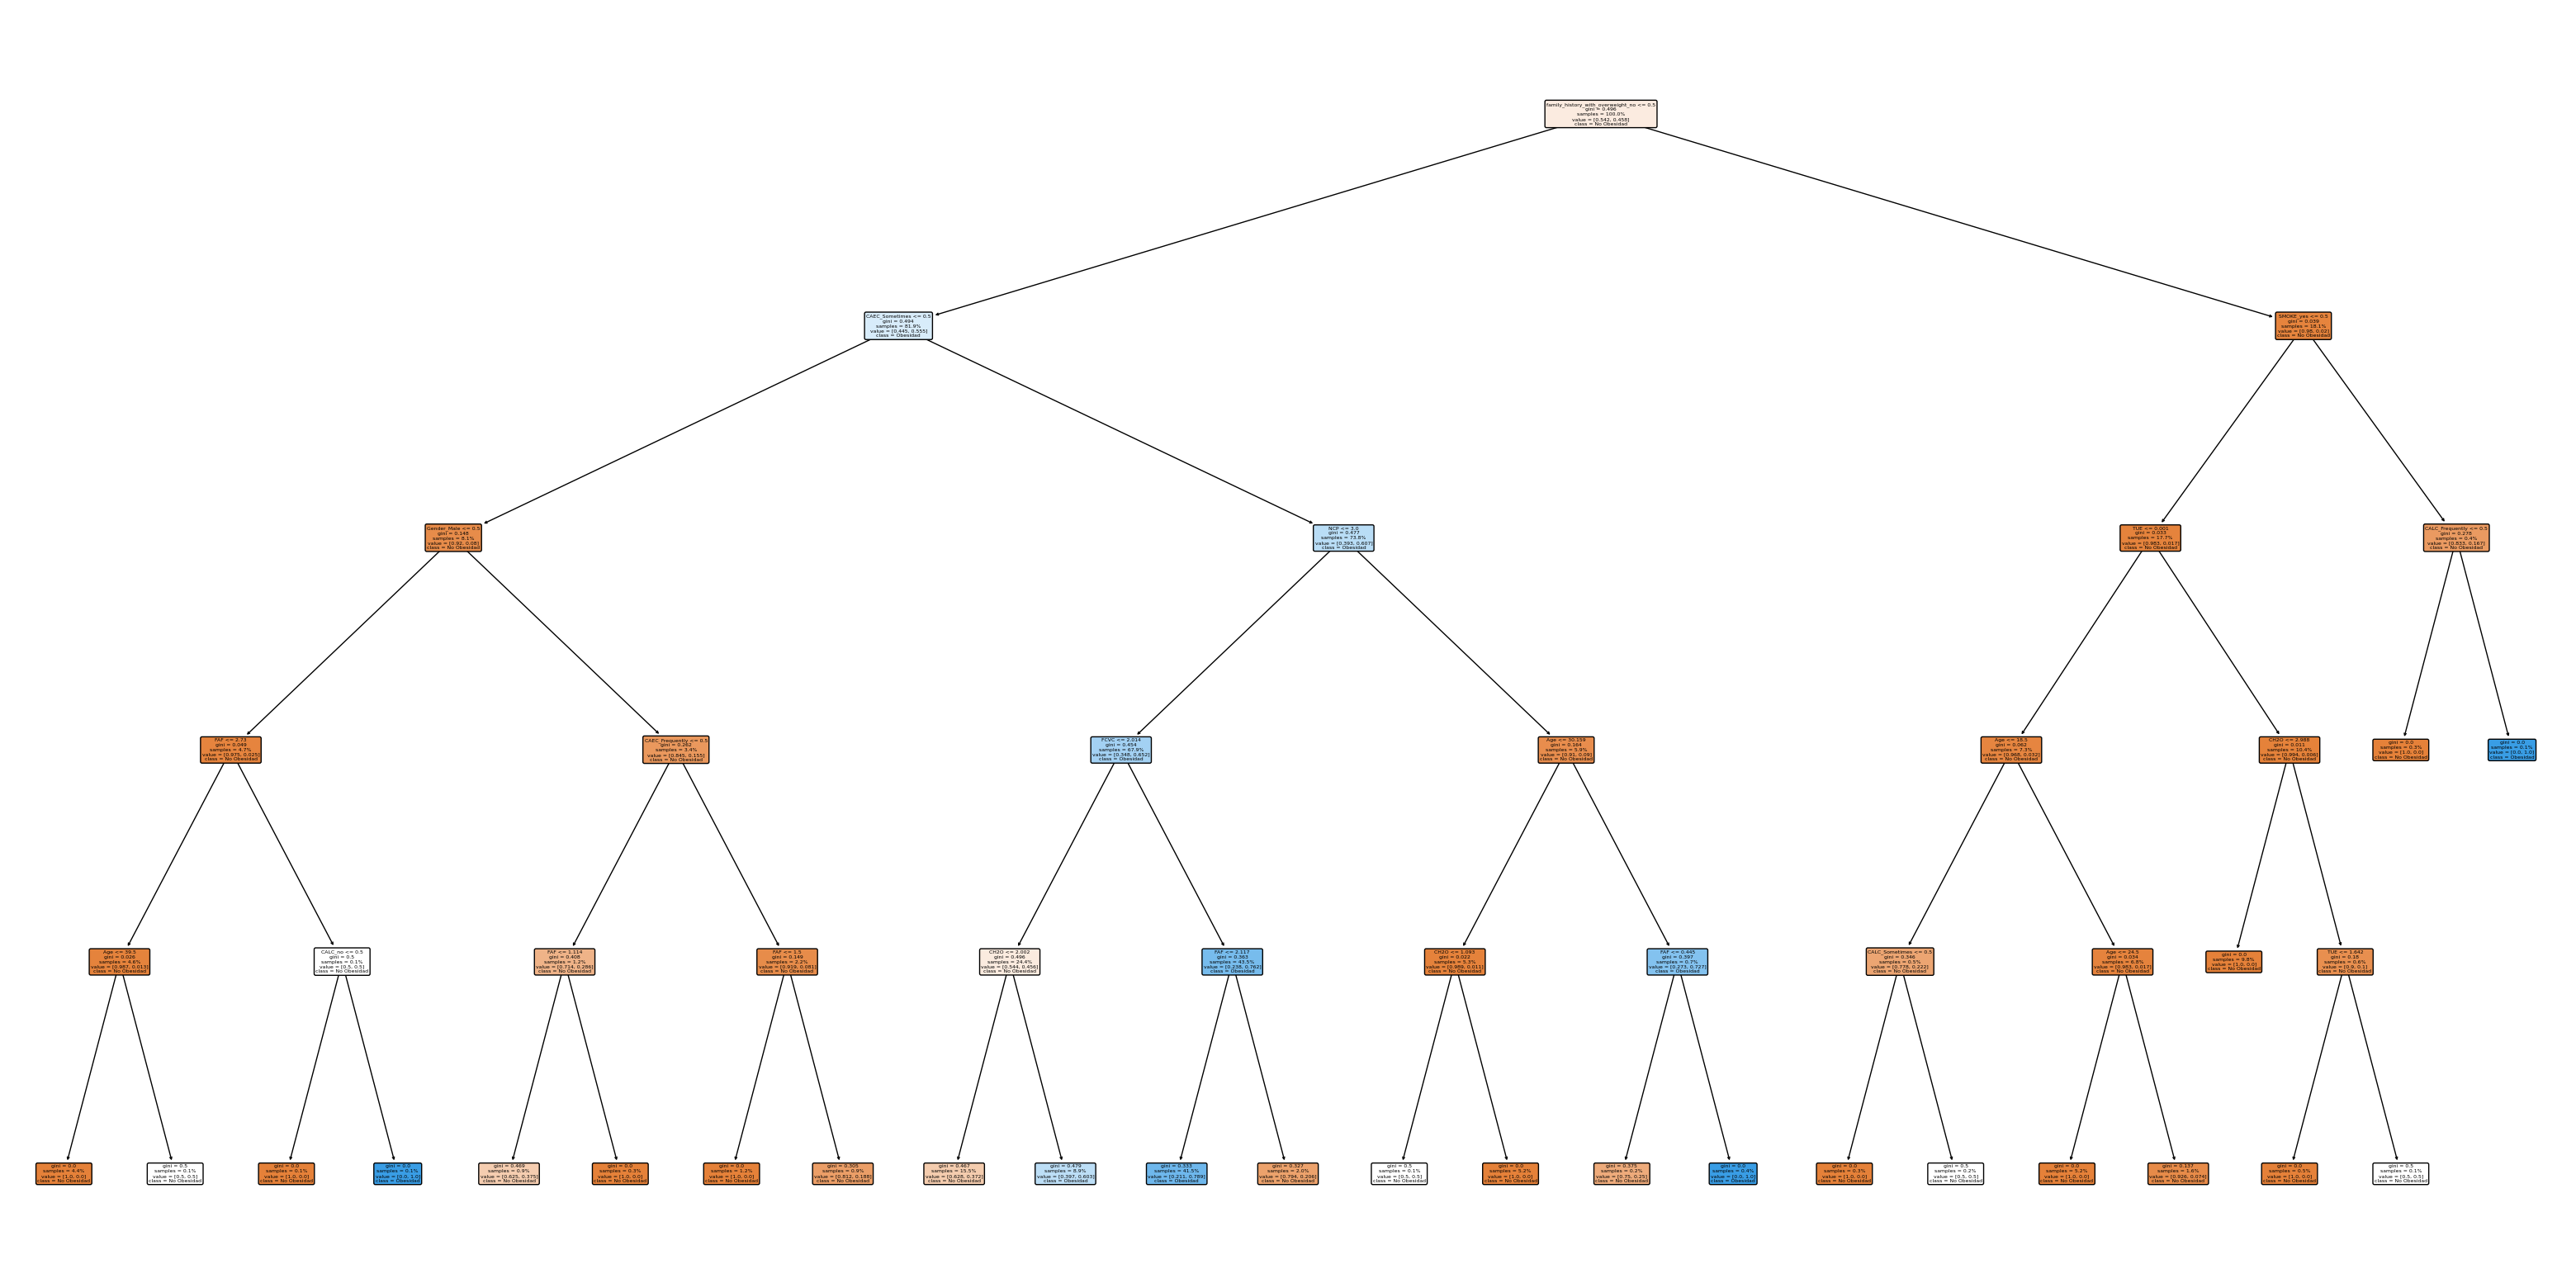

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['No Obesidad', 'Obesidad'], rounded=True, proportion=True)
plt.savefig("Arbol de decisión de obesidad.png")

In [ ]:
print("Matriz de confusion: \n", classification_report(y_test, y_pred))

Matriz de confusion: 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       224
           1       0.76      0.83      0.80       199

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



In [ ]:

nuevas_instancias = [[30, 4, 2, 3, 2, 1, True, False, False, True, False, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, False, False]]

columnas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']
nuevas_instancias_df = pd.DataFrame(nuevas_instancias, columns=columnas)

predicciones = modelo.predict(nuevas_instancias_df)
print(predicciones)


[1]


In [62]:
print(y.columns)
print(y_train.columns)
print(y_test.columns)

Index(['NObeyesdad'], dtype='object')
Index(['NObeyesdad'], dtype='object')
Index(['NObeyesdad'], dtype='object')


## Índices

In [39]:
from sklearn.cluster import KMeans

# Creamos el modelo

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Ajustamos el modelo

y_km = kmeans.fit_predict(X)

# Visualizamos los clusters

import matplotlib.pyplot as plt

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

ValueError: could not convert string to float: 'Female'